In [1]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from cosinorage.dataloaders import AccelerometerDataLoader, ENMODataLoader

In [2]:
reload = True

## Accelerometer Data Loading

In [3]:
if reload:
    acc_loader = AccelerometerDataLoader(input_dir_path='../data/62164/')
    acc_loader.load_data()
    with open("acc_loader.pkl", "wb") as file:
        pickle.dump(acc_loader, file)

Loading CSV files: 100%|██████████| 145/145 [00:14<00:00,  9.96it/s]


Loaded 41760000 accelerometer data records from ../data/62164/
The frequency of the accelerometer data is 80.0Hz
Filtered out 7200000 accelerometer records due to incomplete daily coverage
Calculated ENMO for 34560000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records


In [4]:
if not reload:
    with open("acc_loader.pkl", "rb") as file:
        acc_loader = pickle.load(file)

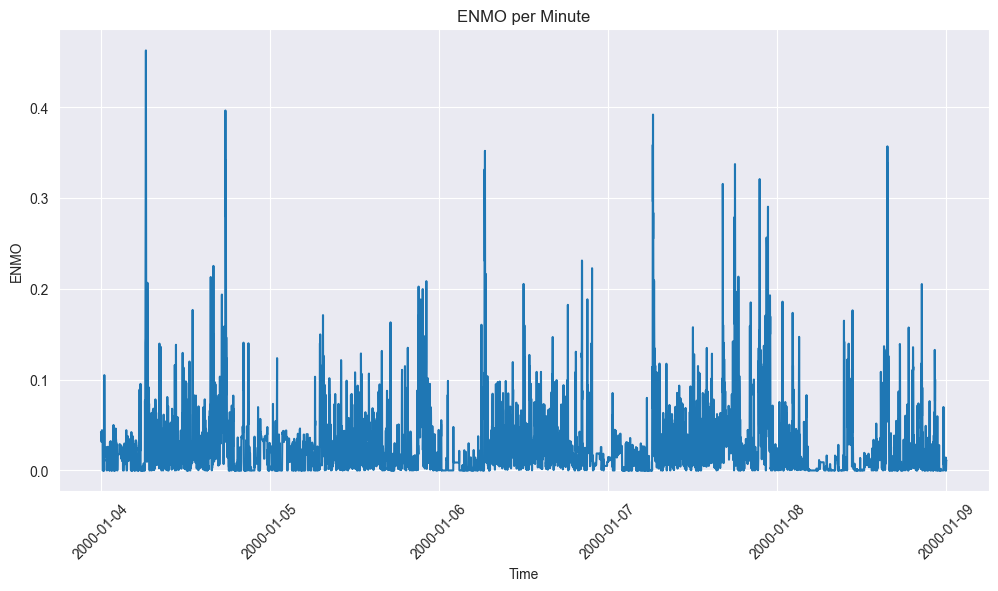

In [5]:
acc_loader.plot_enmo()

## ENMO Data Loading

In [6]:
if reload:
    enmo_loader = ENMODataLoader(input_file_path='../data/62164.csv')
    enmo_loader.load_data()
    with open("enmo_loader.pkl", "wb") as file:
        pickle.dump(enmo_loader, file)

Loaded 10080 minute-level ENMO records from ../data/62164.csv
Filtered out 0 minute-level ENMO records due to incomplete daily coverage


In [7]:
if not reload:
    with open("enmo_loader.pkl", "rb") as file:
        enmo_loader = pickle.load(file)

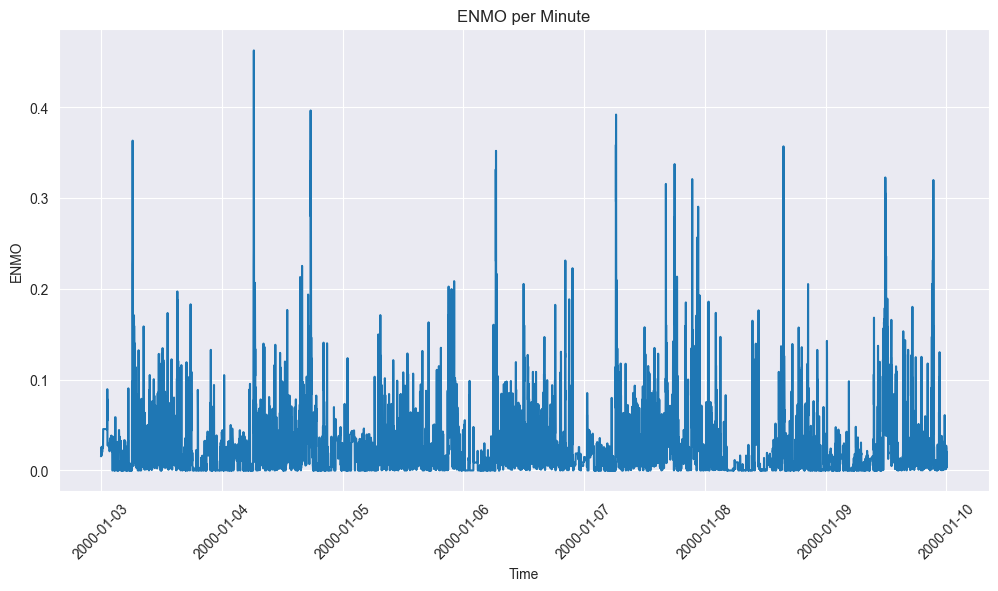

In [8]:
enmo_loader.plot_enmo()

## ENMO Difference between Accelerometer and ENMO DataLoader

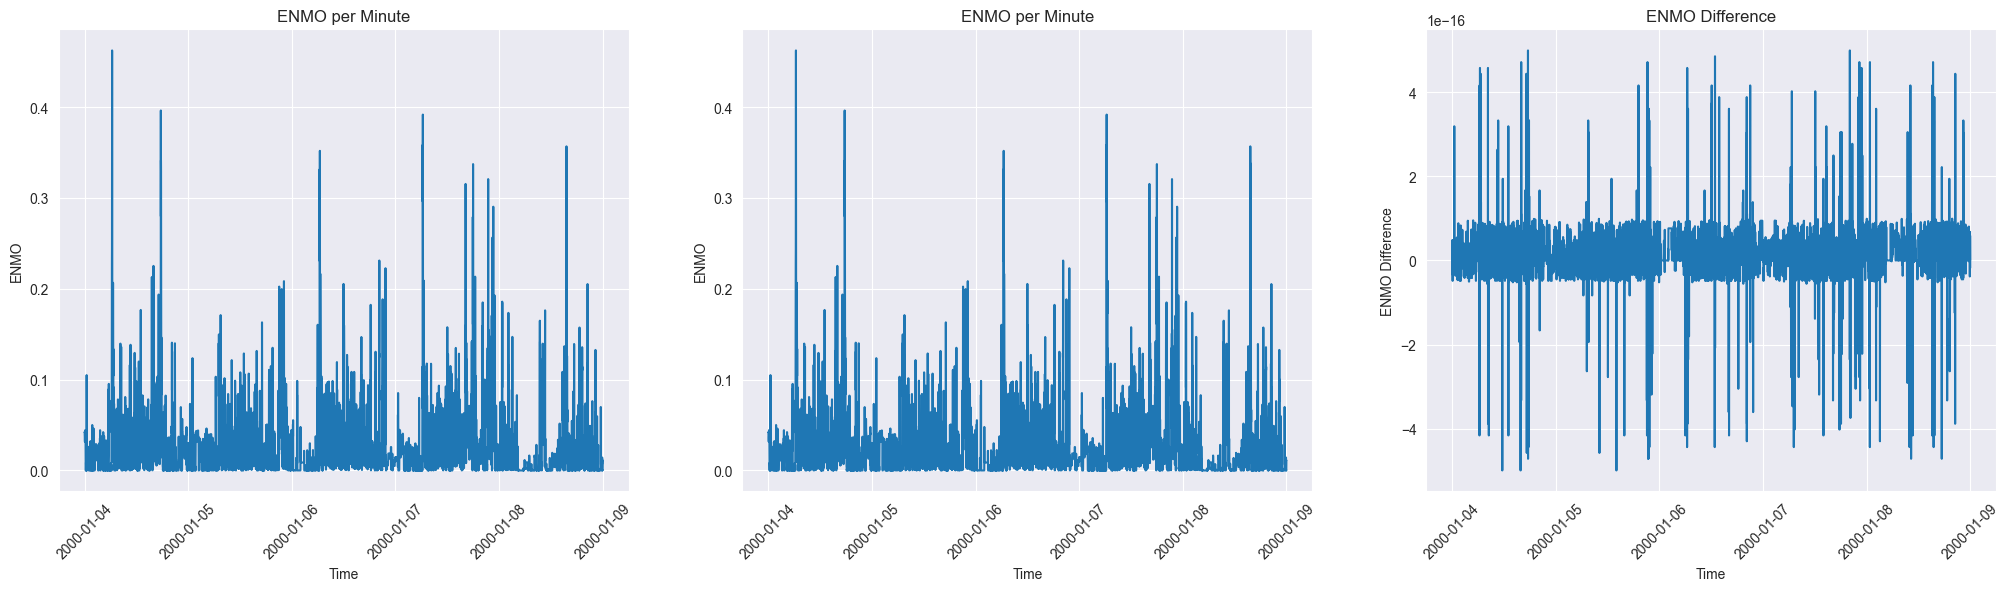

In [14]:
df1 = acc_loader.get_enmo_per_minute()
df2 = enmo_loader.get_enmo_per_minute()

start_date = max(df1.index[0], df2.index[0])
end_date = min(df1.index[-1], df2.index[-1])

# filter for only the overlapping dates
df1 = df1[(df1.index >= start_date) & (df1.index <= end_date)]
df2 = df2[(df2.index >= start_date) & (df2.index <= end_date)]

diff = df1-df2

plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.lineplot(data=df1, x='TIMESTAMP', y='ENMO')
plt.xlabel('Time')
plt.ylabel('ENMO')
plt.title('ENMO per Minute')
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
sns.lineplot(data=df2, x='TIMESTAMP', y='ENMO')
plt.xlabel('Time')
plt.ylabel('ENMO')
plt.title('ENMO per Minute')
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
sns.lineplot(data=diff, x='TIMESTAMP', y='ENMO')
plt.xlabel('Time')
plt.ylabel('ENMO Difference')
plt.title('ENMO Difference')
plt.xticks(rotation=45)
plt.show()